# Sesión 17 - Incumplimiento de Citas

In [54]:
#Importar las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score, classification_report
from imblearn.over_sampling import RandomOverSampler

# Lectura y exploración de datos

In [55]:
train_raw=pd.read_excel('citaschallenge(1).xlsx', sheet_name='train2013')

In [56]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67650 entries, 0 to 67649
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   GENERO           67650 non-null  object        
 1   EDAD             67650 non-null  float64       
 2   ESPECIALIDAD     67650 non-null  object        
 3   TIPO_AFILIACION  67650 non-null  object        
 4   FECHA_CITA       67650 non-null  datetime64[ns]
 5   id               67650 non-null  int64         
 6   ESTAFINAL        67650 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 3.6+ MB


## Análisis exploratorio de datos

### Análisis de variables escalares

In [57]:
# Definición de una función para analizar columnas de un dataframe de Python. 
# Puede utilizarse en otros ejemplos
def analizar_escalar(df, nombre_columna):
    col = df[nombre_columna]
    
    # 1. Cálculo de Estadísticas
    stats = {
        "Media": col.mean(),
        "Mediana": col.median(),
        "Desviación Estándar": col.std(),
        "Varianza": col.var(),
        "Kurtosis": col.kurt(),
        "Skewness (Asimetría)": col.skew()
    }
    
    # Imprimir resultados numéricos
    print(f"--- Estadísticas de '{nombre_columna}' ---")
    for key, value in stats.items():
        print(f"{key:<20}: {value:.4f}")
        
    # 2. Visualización (Histograma y Boxplot)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Histograma
    ax1.hist(col, bins='auto', color='skyblue', edgecolor='black', alpha=0.7)
    ax1.set_title(f'Histograma de {nombre_columna}')
    ax1.set_xlabel('Valor')
    ax1.set_ylabel('Frecuencia')
    # Opcional: Línea de la media
    ax1.axvline(col.mean(), color='red', linestyle='dashed', linewidth=1, label='Media')
    ax1.legend()
    
    # Boxplot
    ax2.boxplot(col, vert=False, patch_artist=True, 
                boxprops=dict(facecolor='lightgreen', color='black'),
                medianprops=dict(color='red'))
    ax2.set_title(f'Boxplot de {nombre_columna}')
    ax2.set_xlabel('Valor')
    
    plt.tight_layout()
    plt.show()

--- Estadísticas de 'EDAD' ---
Media               : 38.7000
Mediana             : 38.0000
Desviación Estándar : 14.5251
Varianza            : 210.9775
Kurtosis            : 0.2433
Skewness (Asimetría): 0.0568


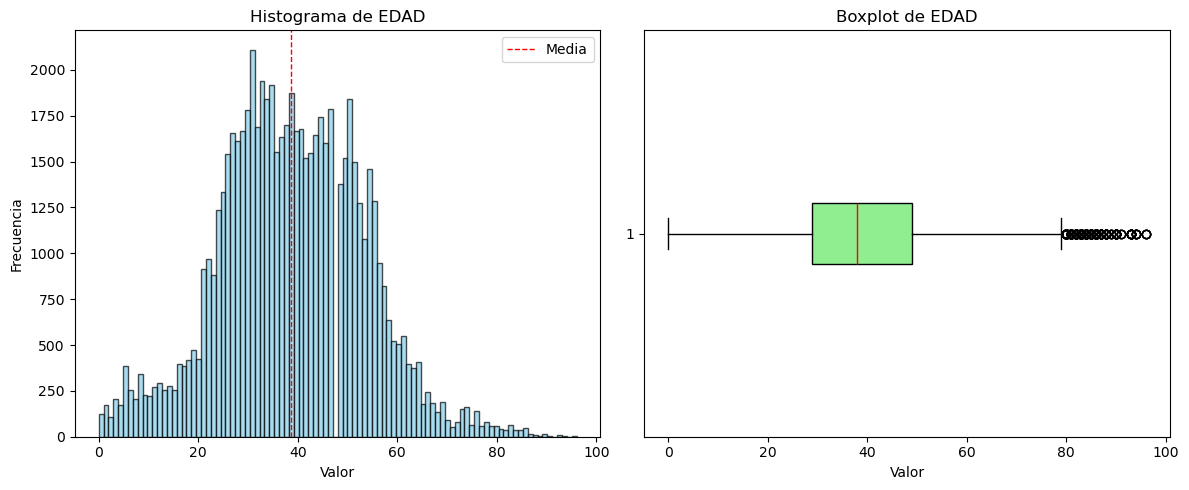

In [58]:
#Llamar a la función con mi variable edad
analizar_escalar(train_raw,'EDAD')

### Análisis de variables categóricas

In [59]:
# Definición de una función para analizar columnas de un dataframe de Python. 
# Puede utilizarse en otros ejemplos
def analizar_categorica(df, nombre_columna):
    # 1. Calcular conteo y porcentajes
    conteo = df[nombre_columna].value_counts()
    porcentaje = df[nombre_columna].value_counts(normalize=True) * 100
    
    # Crear un DataFrame resumen para visualizar los datos numéricos
    resumen = pd.DataFrame({
        'Frecuencia': conteo,
        'Porcentaje (%)': porcentaje.round(2)
    })
    
    print(f"--- Análisis de '{nombre_columna}' ---")
    print(resumen)
    print("-" * 30)
    
    # 2. Generar Gráfico de Barras
    plt.figure(figsize=(10, 6))
    
    # Crear el gráfico
    # Si tienes muchas categorías, cambia a orient='h' (horizontal) para leer mejor
    ax = sns.barplot(x=conteo.index, y=conteo.values, palette='viridis')
    
    # Títulos y etiquetas
    plt.title(f'Distribución de: {nombre_columna}', fontsize=15)
    plt.ylabel('Frecuencia (Cantidad)')
    plt.xlabel(nombre_columna)
    plt.xticks(rotation=45) # Rotar etiquetas si son muy largas
    
    # Agregar los números exactos encima de cada barra (Etiquetas de datos)
    for i in ax.containers:
        ax.bar_label(i, fmt='%d', padding=3)
        
    plt.tight_layout()
    plt.show()

In [60]:
categoricas=['GENERO', 'ESPECIALIDAD', 'TIPO_AFILIACION','ESTAFINAL']

--- Análisis de 'GENERO' ---
           Frecuencia  Porcentaje (%)
GENERO                               
MASCULINO       34346           50.77
FEMENINO        33304           49.23
------------------------------


C:\Users\santi\AppData\Local\Temp\ipykernel_30184\402518290.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.index, y=conteo.values, palette='viridis')


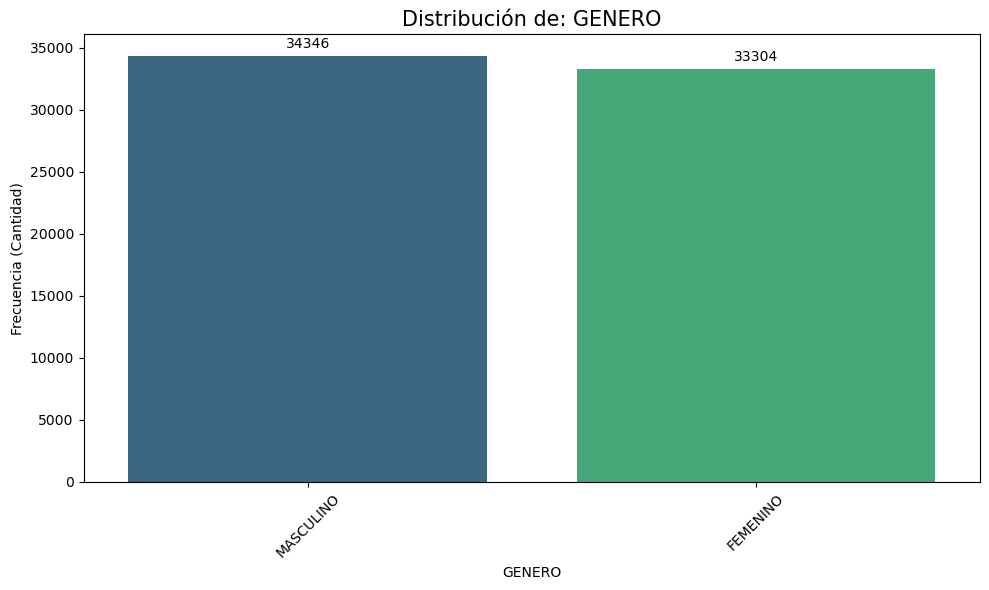

--- Análisis de 'ESPECIALIDAD' ---
                           Frecuencia  Porcentaje (%)
ESPECIALIDAD                                         
FISIOTERAPIA                    15136           22.37
TERAPIA OCUPACIONAL             14546           21.50
MEDICINA GENERAL                 6756            9.99
ORTOPEDIA Y TRAUMATOLOGIA        5306            7.84
CIRUGIA DE LA MANO               3859            5.70
ODONTOLOGIA                      3484            5.15
FISIATRIA                        2428            3.59
OPTOMETRIA                       1543            2.28
DERMATOLOGIA                     1432            2.12
GINECOLOGIA                      1377            2.04
ODONTOLOGIA PEDIATRICA           1071            1.58
PSICOLOGIA                       1060            1.57
ACUPUNTURA                        869            1.28
OFTALMOLOGIA                      858            1.27
RADIOLOGIA                        801            1.18
OTORRINOLARINGOLOGIA              776          

C:\Users\santi\AppData\Local\Temp\ipykernel_30184\402518290.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.index, y=conteo.values, palette='viridis')


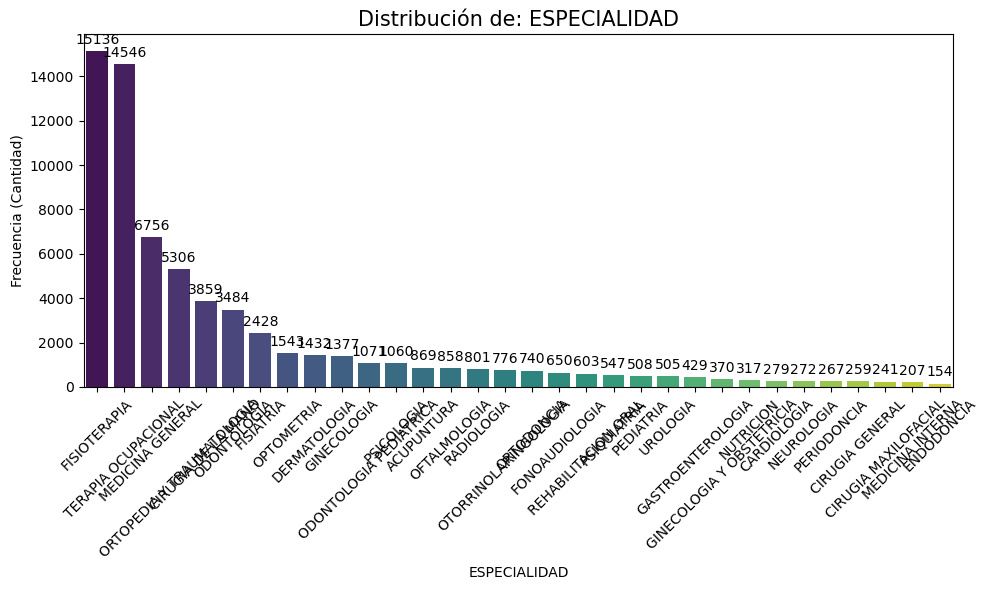

--- Análisis de 'TIPO_AFILIACION' ---
                 Frecuencia  Porcentaje (%)
TIPO_AFILIACION                            
SILVER                36396           53.80
GOLD                  28986           42.85
CONVENIO               2268            3.35
------------------------------


C:\Users\santi\AppData\Local\Temp\ipykernel_30184\402518290.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.index, y=conteo.values, palette='viridis')


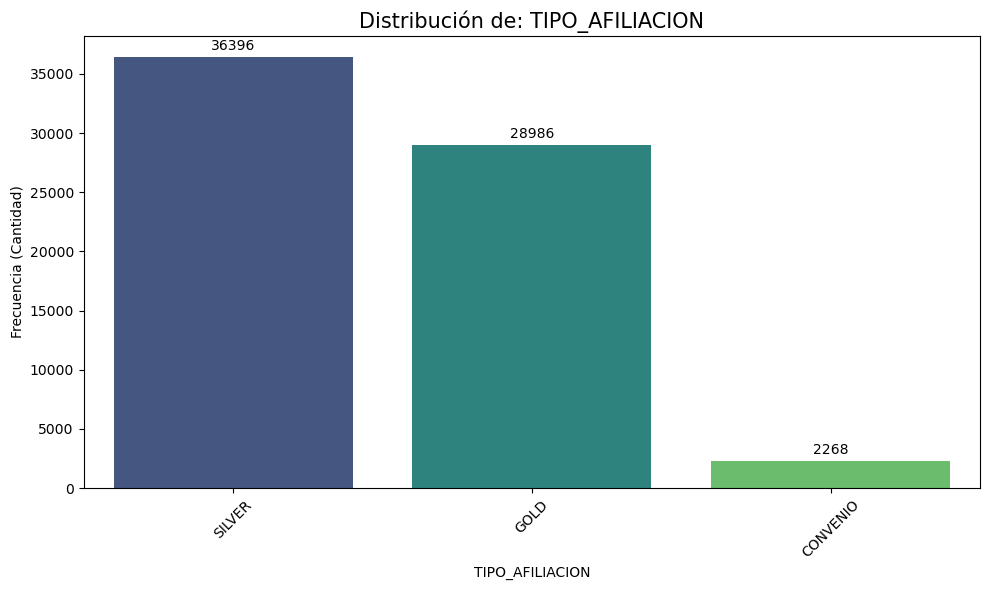

--- Análisis de 'ESTAFINAL' ---
           Frecuencia  Porcentaje (%)
ESTAFINAL                            
2               43025           63.60
3               12655           18.71
1               11970           17.69
------------------------------


C:\Users\santi\AppData\Local\Temp\ipykernel_30184\402518290.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.index, y=conteo.values, palette='viridis')


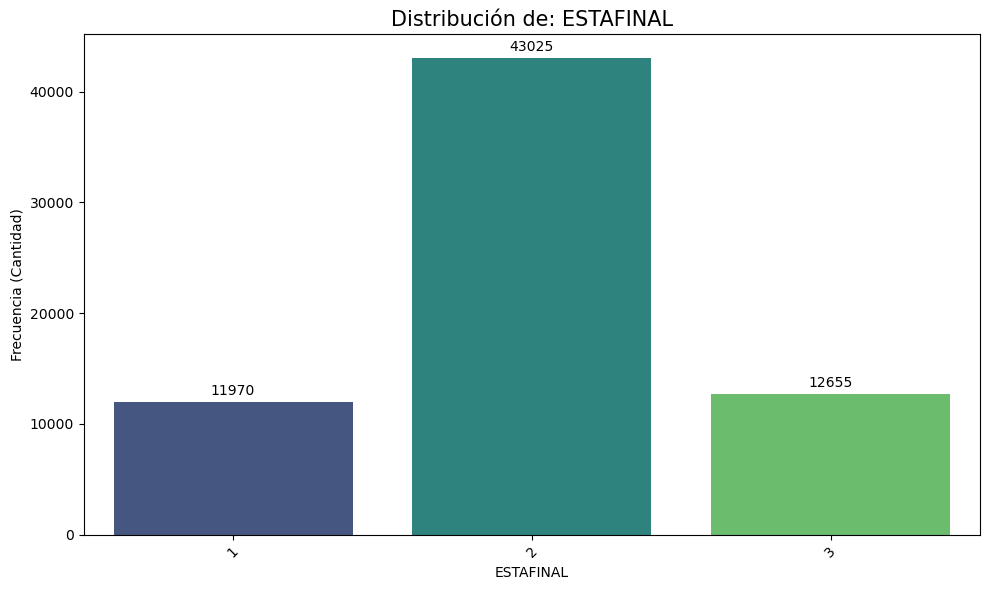

In [61]:
for variable in categoricas:
    analizar_categorica(train_raw, variable)

### Análisis de variable de fecha

In [62]:
# Definición de una función para analizar columnas de un dataframe de Python. 
# Puede utilizarse en otros ejemplos
def analizar_fechas(df, nombre_columna):
    # 0. Copia de seguridad para no alterar el df original
    datos = df.copy()
    
    # 1. Convertir a datetime si no lo es
    datos[nombre_columna] = pd.to_datetime(datos[nombre_columna], errors='coerce')
    
    # Eliminar NaT (fechas invalidas) para el análisis
    datos = datos.dropna(subset=[nombre_columna])
    col = datos[nombre_columna]
    
    # 2. Estadísticas Básicas
    min_fecha = col.min()
    max_fecha = col.max()
    rango = max_fecha - min_fecha
    
    print(f"--- Análisis Temporal de '{nombre_columna}' ---")
    print(f"Fecha Inicio  : {min_fecha}")
    print(f"Fecha Fin     : {max_fecha}")
    print(f"Duración Total: {rango.days} días")
    print("-" * 30)

    # 3. Preparar datos para gráficos
    # Extraemos componentes
    datos['mes'] = col.dt.month_name()
    datos['dia_semana'] = col.dt.day_name()
    # Agrupamos por mes (frecuencia temporal)
    # 'M' agrupa por mes, 'D' por día. Usamos size() para contar registros por periodo.
    tendencia = datos.set_index(nombre_columna).resample('M').size()

    # 4. Visualización (Grid 2x2 o combinada)
    plt.figure(figsize=(14, 10))
    
    # Gráfico A: Línea de Tiempo (Tendencia General)
    plt.subplot(2, 1, 1) # Ocupa toda la fila de arriba
    plt.plot(tendencia.index, tendencia.values, marker='o', linestyle='-', color='royalblue')
    plt.title(f'Evolución Temporal (Volumen por Mes)', fontsize=14)
    plt.ylabel('Cantidad de Registros')
    plt.grid(True, alpha=0.3)
    
    # Gráfico B: Distribución por Día de la Semana
    plt.subplot(2, 2, 3)
    order_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    sns.countplot(data=datos, x='dia_semana', order=order_dias, palette='viridis')
    plt.title('Actividad por Día de la Semana')
    plt.xticks(rotation=45)
    plt.xlabel('')
    
    # Gráfico C: Distribución por Mes (Estacionalidad anual)
    plt.subplot(2, 2, 4)
    order_meses = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']
    # Filtramos solo los meses que existen en los datos para no tener barras vacías innecesarias
    meses_presentes = [m for m in order_meses if m in datos['mes'].unique()]
    
    sns.countplot(data=datos, x='mes', order=meses_presentes, palette='magma')
    plt.title('Actividad por Mes del Año')
    plt.xticks(rotation=45)
    plt.xlabel('')

    plt.tight_layout()
    plt.show()

--- Análisis Temporal de 'FECHA_CITA' ---
Fecha Inicio  : 2013-07-02 06:30:00
Fecha Fin     : 2013-11-21 18:40:00
Duración Total: 142 días
------------------------------


C:\Users\santi\AppData\Local\Temp\ipykernel_30184\2109085027.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tendencia = datos.set_index(nombre_columna).resample('M').size()
C:\Users\santi\AppData\Local\Temp\ipykernel_30184\2109085027.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=datos, x='dia_semana', order=order_dias, palette='viridis')
C:\Users\santi\AppData\Local\Temp\ipykernel_30184\2109085027.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=datos, x='mes', order=meses_presentes, palette='magma')


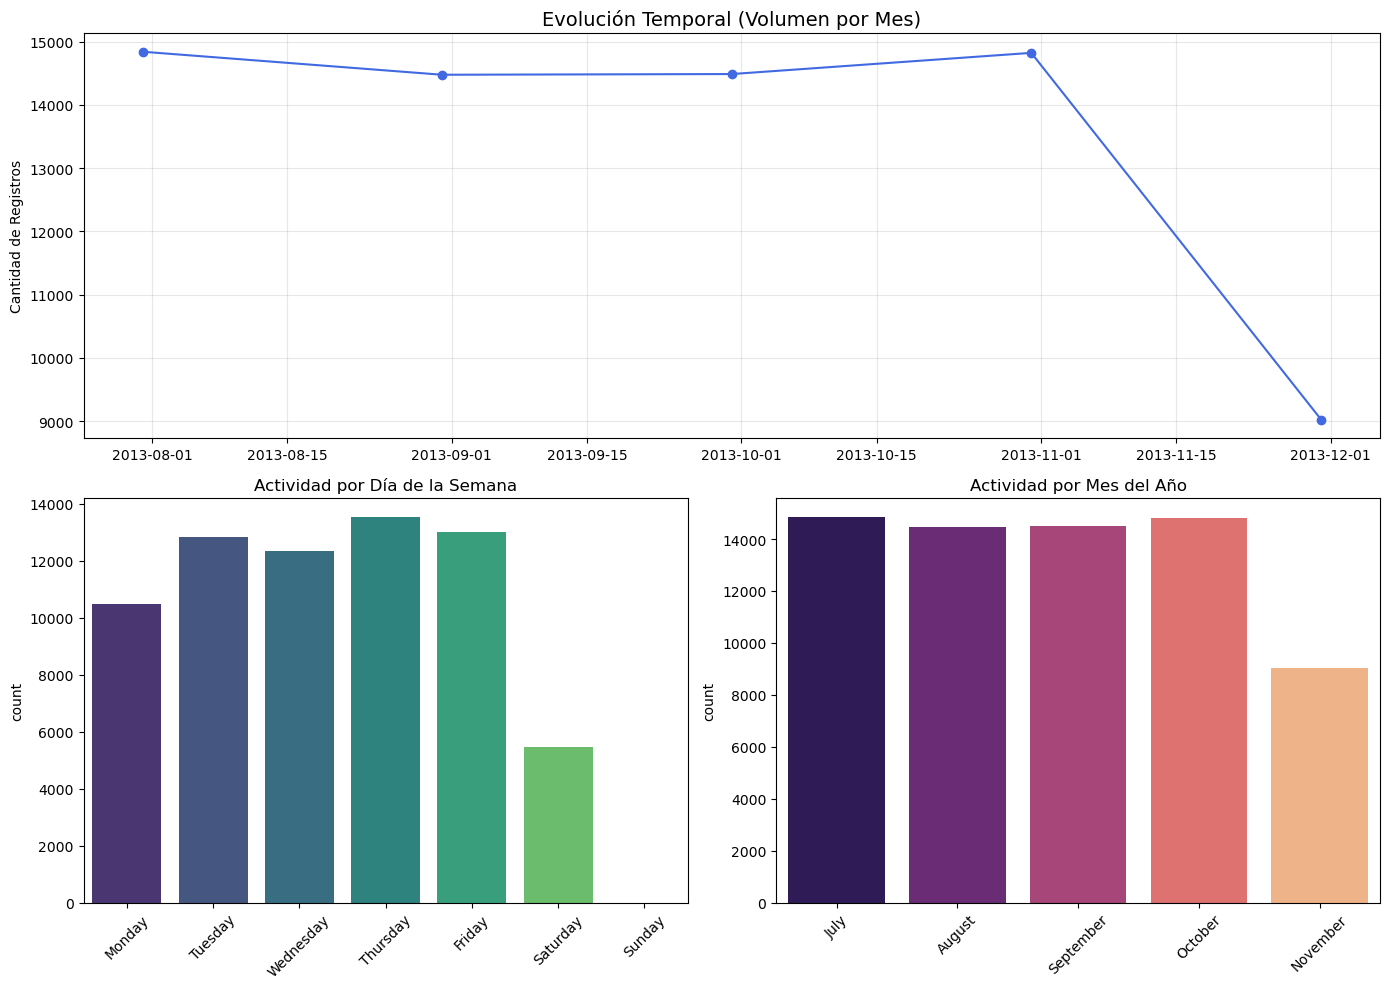

In [63]:
analizar_fechas(train_raw,'FECHA_CITA' )

## Decisiones

In [64]:
# Eliminar el id
# Eliminar la columna de fecha, pero me quedo con el día de la semana y el día del mes
train_raw['DIA_SEMANA']=train_raw['FECHA_CITA'].dt.dayofweek
train_raw['DIA_MES']=train_raw['FECHA_CITA'].dt.day
train_final=train_raw.drop(columns=['id', 'FECHA_CITA'])

In [65]:
train_final.head(5)

,GENERO,EDAD,ESPECIALIDAD,TIPO_AFILIACION,ESTAFINAL,DIA_SEMANA,DIA_MES
0,FEMENINO,41.0,ORTODONCIA,GOLD,3,1,2
1,FEMENINO,49.0,TERAPIA OCUPACIONAL,SILVER,2,1,2
2,FEMENINO,41.0,FISIOTERAPIA,GOLD,2,1,2
3,FEMENINO,49.0,FISIOTERAPIA,GOLD,1,1,2
4,FEMENINO,36.0,RADIOLOGIA,GOLD,3,1,2


# Modelado

In [66]:
# División X y Y
X=train_final.drop(columns=['ESTAFINAL'])
y=train_final['ESTAFINAL']

In [67]:
# Divisón entre train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Procesar dummies
X_Train_procesado = pd.get_dummies(X_train, drop_first=True)
X_Test_procesado = pd.get_dummies(X_test, drop_first=True)


In [78]:
# Árbol de decisión 1
arbol_1 = DecisionTreeClassifier(random_state=42, criterion ='gini')
arbol_2 = DecisionTreeClassifier(random_state=42, criterion ='entropy')
arbol_3 = DecisionTreeClassifier(random_state=42, criterion ='gini', max_depth=3)


In [79]:
# Entrenar el árbol
arbol_1.fit(X_Train_procesado, y_train)
arbol_2.fit(X_Train_procesado, y_train)
arbol_3.fit(X_Train_procesado, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [80]:
# Hacer predicciones
y_pred_1=arbol_1.predict(X_Test_procesado)
y_pred_2=arbol_2.predict(X_Test_procesado)
y_pred_3=arbol_3.predict(X_Test_procesado)

In [81]:
# Evaluar el rendimiento del árbol 1
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           1       0.20      0.24      0.22      2452
           2       0.68      0.66      0.67      8595
           3       0.32      0.28      0.30      2483

    accuracy                           0.51     13530
   macro avg       0.40      0.39      0.40     13530
weighted avg       0.53      0.51      0.52     13530



In [82]:
f1_valores_arbol_1=f1_score(y_test, y_pred_1, average=None)
f1_valores_arbol_1

array([0.21824818, 0.66765105, 0.30200043])

In [83]:
#F1 score ponderado
def calculo_f_ponderado(lista_f):
    return lista_f@np.array([0.3, 0.2, 0.5])

In [84]:
calculo_f_ponderado(f1_valores_arbol_1)

np.float64(0.3500048785105926)

In [85]:
# Evaluar el rendimiento del árbol 2
print(classification_report(y_test, y_pred_2))
f1_valores_arbol_2=f1_score(y_test, y_pred_2, average=None)
print("FScore ponderado: \n")
print(calculo_f_ponderado(f1_valores_arbol_2))

              precision    recall  f1-score   support

           1       0.21      0.26      0.23      2452
           2       0.68      0.66      0.67      8595
           3       0.31      0.27      0.29      2483

    accuracy                           0.52     13530
   macro avg       0.40      0.40      0.40     13530
weighted avg       0.53      0.52      0.52     13530

FScore ponderado: 

0.34811381819700354


In [86]:
# Evaluar el rendimiento del árbol 3
print(classification_report(y_test, y_pred_3))
f1_valores_arbol_3=f1_score(y_test, y_pred_3, average=None)
print("FScore ponderado: \n")
print(calculo_f_ponderado(f1_valores_arbol_3))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2452
           2       0.64      1.00      0.78      8595
           3       0.84      0.05      0.10      2483

    accuracy                           0.64     13530
   macro avg       0.49      0.35      0.29     13530
weighted avg       0.56      0.64      0.51     13530

FScore ponderado: 

0.20504160229075344


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Ver el árbol

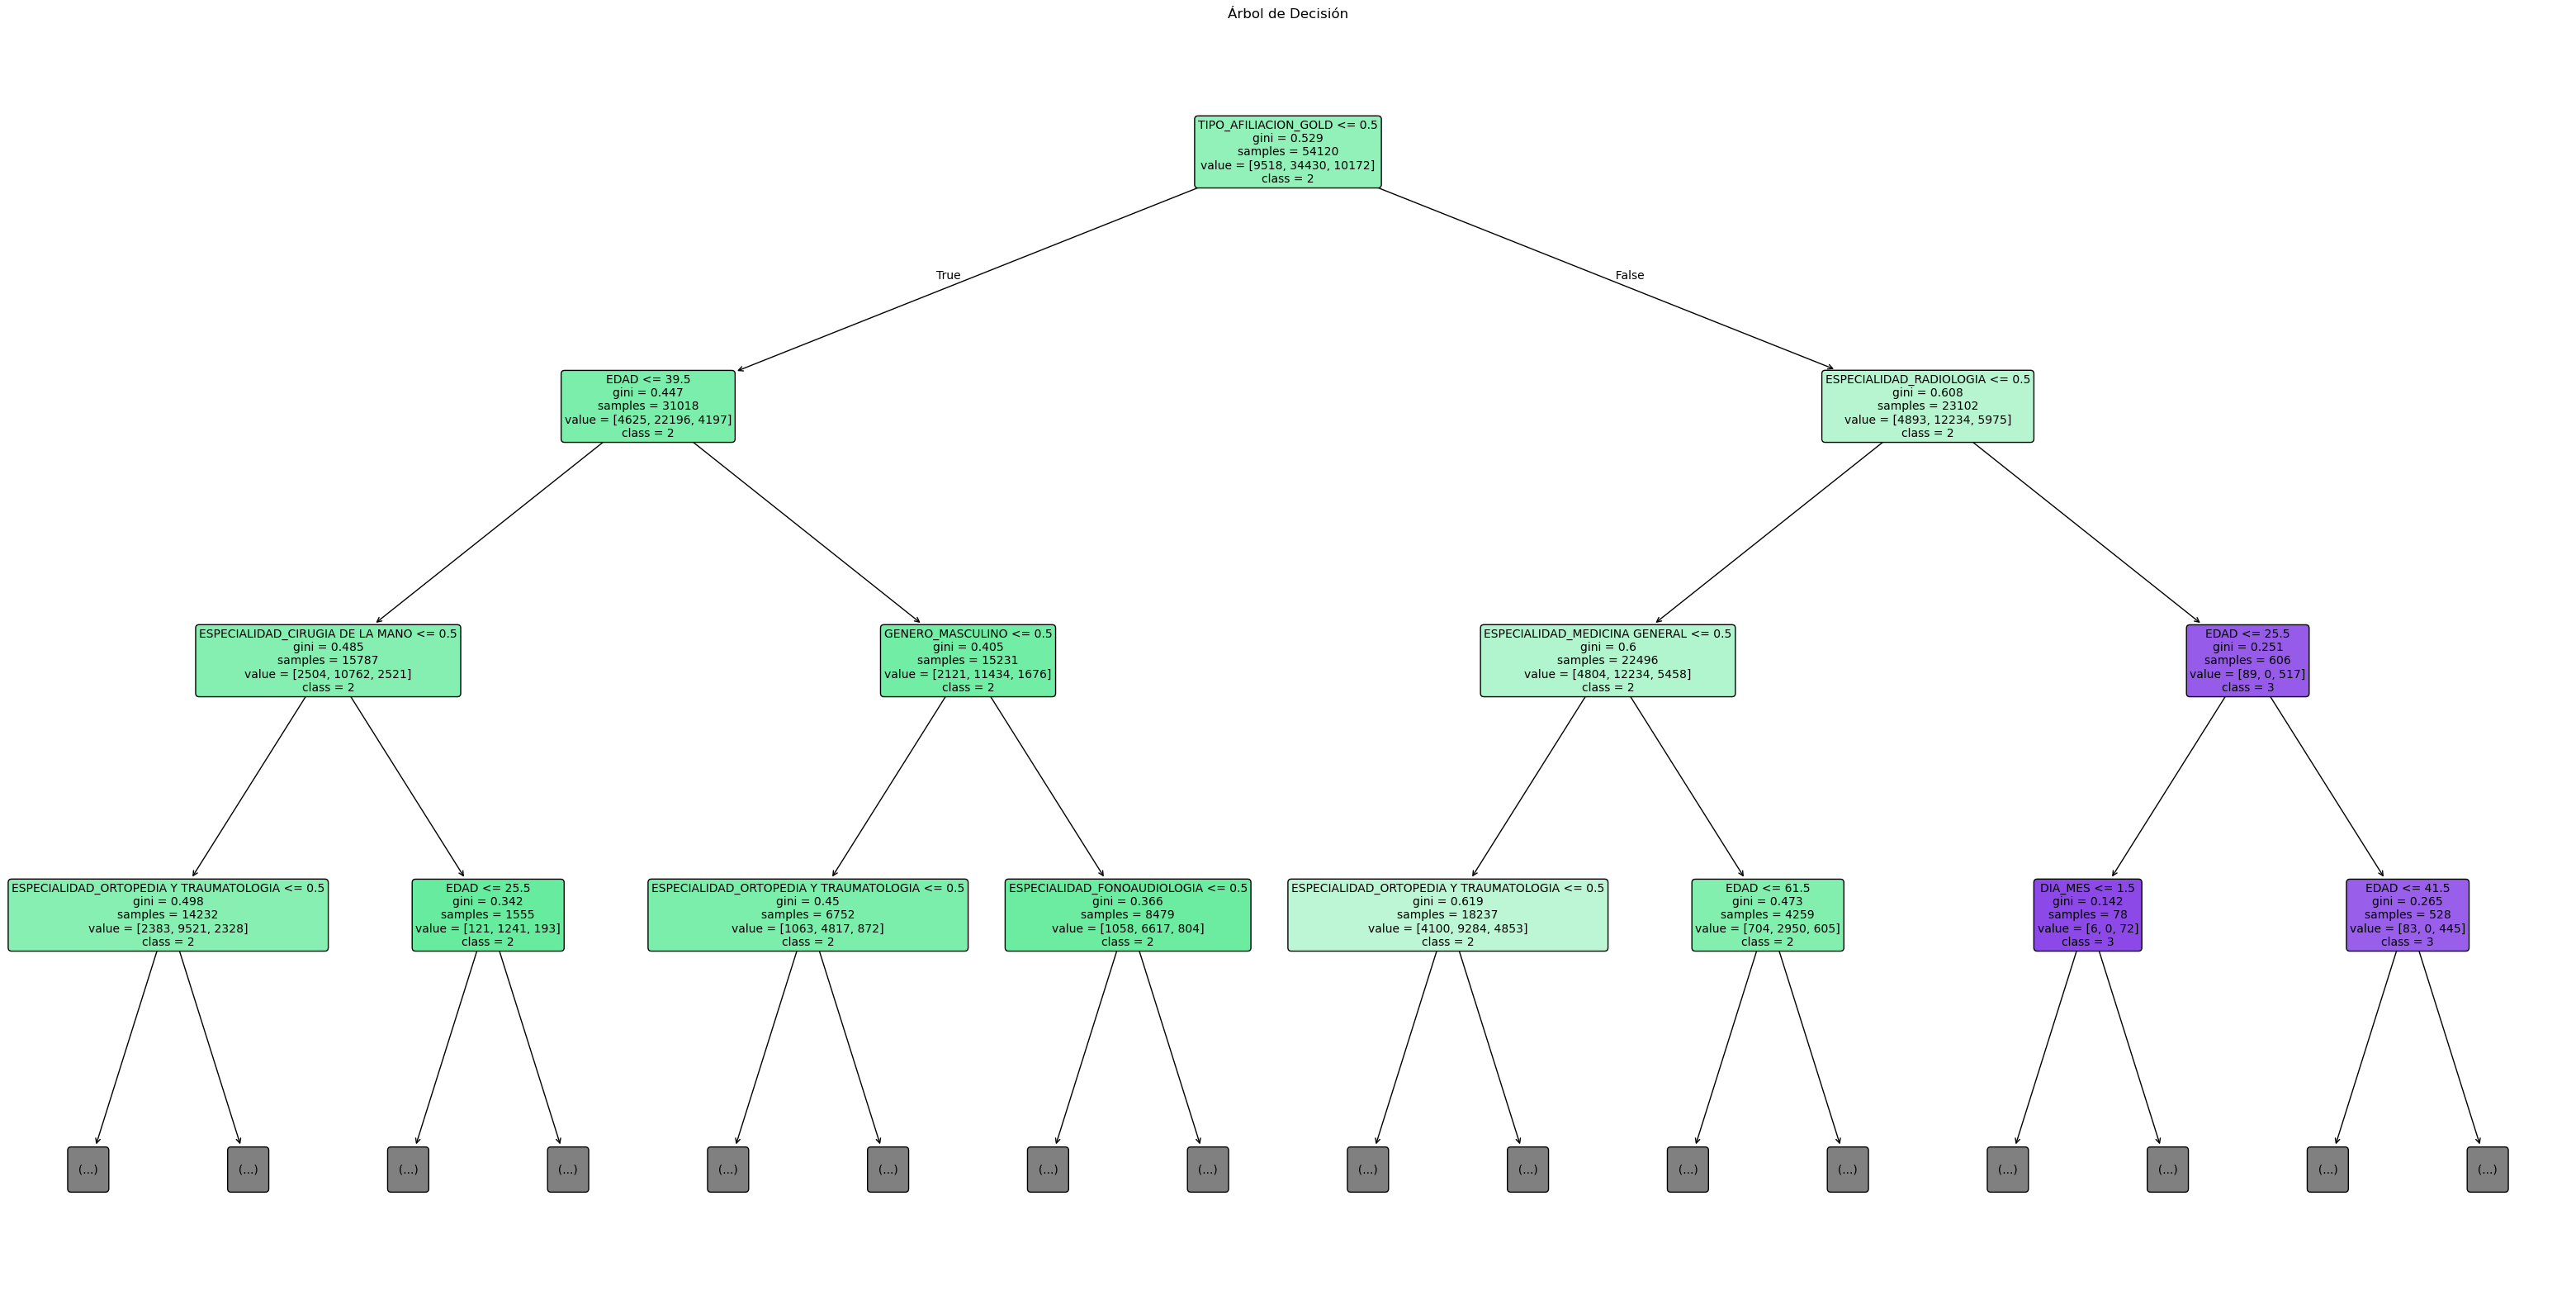

In [89]:
plt.figure(figsize=(40, 20))
plot_tree(arbol_1, 
          max_depth=3,
          feature_names=X_Train_procesado.columns, 
          class_names=[str(c) for c in arbol_1.classes_], 
          filled=True,     
          rounded=True,     
          fontsize=10)      

# 3. Mostrar el gráfico
# 3. Mostrar el gráfico
plt.title("Árbol de Decisión")
plt.show()

## Mejorar el modelo: balanceo

In [91]:
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_Train_procesado, y_train)

In [93]:
arbol_OS = DecisionTreeClassifier(random_state=42, criterion ='gini')

arbol_OS.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(random_state=42)

In [94]:
y_pred_OS=arbol_OS.predict(X_Test_procesado)

In [96]:
# Evaluar el rendimiento del árbol OS
print(classification_report(y_test, y_pred_OS))
f1_valores_arbol_OS=f1_score(y_test, y_pred_OS, average=None)
print("FScore ponderado: \n")
print(calculo_f_ponderado(f1_valores_arbol_OS))

              precision    recall  f1-score   support

           1       0.20      0.27      0.23      2452
           2       0.67      0.59      0.63      8595
           3       0.28      0.30      0.29      2483

    accuracy                           0.48     13530
   macro avg       0.38      0.39      0.38     13530
weighted avg       0.52      0.48      0.49     13530

FScore ponderado: 

0.33947922101268047


## Mejorar el modelo: ensambles

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [112]:
grandient_classifier= GradientBoostingClassifier(n_estimators=50, max_depth=5)
grandient_classifier.fit(X_Train_procesado, y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=50)

In [113]:
y_pred_gb=grandient_classifier.predict(X_Test_procesado)

In [114]:
# Evaluar el rendimiento del árbol GB
print(classification_report(y_test, y_pred_gb))
f1_valores_arbol_GB=f1_score(y_test, y_pred_gb, average=None)
print("FScore ponderado: \n")
print(calculo_f_ponderado(f1_valores_arbol_GB))

              precision    recall  f1-score   support

           1       0.56      0.01      0.01      2452
           2       0.65      0.99      0.79      8595
           3       0.61      0.12      0.20      2483

    accuracy                           0.65     13530
   macro avg       0.61      0.37      0.33     13530
weighted avg       0.63      0.65      0.54     13530

FScore ponderado: 

0.25897412436959566


### Extreme Gradient Boosting

In [116]:
import xgboost as xgb

In [ ]:
y_train_xgb=y_train
y_train_xgb=y_train_xgb-1

In [123]:
y_test_xgb=y_test
y_test_xgb=y_test_xgb-1

In [124]:
xgb_classifier=xgb.XGBClassifier()
xgb_classifier.fit(X_Train_procesado, y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [126]:
y_pred_xgb=xgb_classifier.predict(X_Test_procesado)

In [128]:
# Evaluar el rendimiento del árbol GB
print(classification_report(y_test_xgb, y_pred_xgb))
f1_valores_arbol_XGB=f1_score(y_test_xgb, y_pred_xgb, average=None)
print("FScore ponderado: \n")
print(calculo_f_ponderado(f1_valores_arbol_XGB))

              precision    recall  f1-score   support

           0       0.46      0.03      0.06      2452
           1       0.67      0.97      0.79      8595
           2       0.56      0.19      0.28      2483

    accuracy                           0.66     13530
   macro avg       0.56      0.40      0.38     13530
weighted avg       0.61      0.66      0.56     13530

FScore ponderado: 

0.3162865041437805


### Regresión logística

In [130]:
from sklearn.linear_model import LogisticRegression

In [139]:
log_reg=LogisticRegression(random_state=42, max_iter=5000)
log_reg.fit(X_train_ros, y_train_ros)

LogisticRegression(max_iter=5000, random_state=42)

In [140]:
y_pred_lr=grandient_classifier.predict(X_Test_procesado)

In [141]:
# Evaluar el rendimiento de la regresión
print(classification_report(y_test, y_pred_lr))
f1_valores_LR=f1_score(y_test, y_pred_lr, average=None)
print("FScore ponderado: \n")
print(calculo_f_ponderado(f1_valores_LR))

              precision    recall  f1-score   support

           1       0.56      0.01      0.01      2452
           2       0.65      0.99      0.79      8595
           3       0.61      0.12      0.20      2483

    accuracy                           0.65     13530
   macro avg       0.61      0.37      0.33     13530
weighted avg       0.63      0.65      0.54     13530

FScore ponderado: 

0.25897412436959566


In [143]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
# RIDGE
ridge_model = Pipeline([
    ('logreg', LogisticRegression(
        penalty='l2',
        solver='lbfgs',
        max_iter=5000
    ))
])

ridge_params = {
    'logreg__C': np.logspace(-3, 3, 50)
}

ridge_grid = GridSearchCV(
    ridge_model,
    ridge_params,
    scoring='roc_auc_ovr',
    cv=10
)

ridge_grid.fit(X_train_ros, y_train_ros)

print("Best C Ridge:", ridge_grid.best_params_['logreg__C'])
ridge_best = ridge_grid.best_estimator_


# LASSO 
lasso_model = Pipeline([
    ('logreg', LogisticRegression(
        penalty='l1',
        solver='saga',
        max_iter=10000
    ))
])

lasso_params = {
    'logreg__C': np.logspace(-3, 3, 50)
}

lasso_grid = GridSearchCV(
    lasso_model,
    lasso_params,
    scoring='roc_auc_ovr',
    cv=10
)

lasso_grid.fit(X_train_ros, y_train_ros)

print("Best C Lasso:", lasso_grid.best_params_['logreg__C'])
lasso_best = lasso_grid.best_estimator_


# ELASTIC NET 
elastic_model = Pipeline([
    ('logreg', LogisticRegression(
        penalty='elasticnet',
        solver='saga',
        max_iter=10000
    ))
])

elastic_params = {
    'logreg__C': np.logspace(-3, 3, 50),
    'logreg__l1_ratio': np.linspace(0.1, 0.9, 9)
}

elastic_grid = GridSearchCV(
    elastic_model,
    elastic_params,
    scoring='roc_auc_ovr',
    cv=10
)

elastic_grid.fit(X_train_ros, y_train_ros)

print("Best C ElasticNet:", elastic_grid.best_params_['logreg__C'])
print("Best l1_ratio ElasticNet:", elastic_grid.best_params_['logreg__l1_ratio'])
elastic_best = elastic_grid.best_estimator_

KeyboardInterrupt: 